In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


data2 = pd.read_excel('대구 데이터프레임(7차 수정).xlsx', engine='openpyxl')

# 달성군의 고독사 수 이상치 처리
cleaned_data = data2[data2['고독사 수'] != 4]


numeric_cleaned_data = cleaned_data.select_dtypes(include='number')

# 표준화 작업
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_cleaned_data)


standardized_df = pd.DataFrame(standardized_data, columns=numeric_cleaned_data.columns)

# 상관계수 행렬
correlation_matrix_cleaned = standardized_df.corr()

print(correlation_matrix_cleaned)

          전체 노인인구      독거노인      고독사 수      병원 수      약국 수     경로당 수  \
전체 노인인구   1.000000  0.979198  0.194576  0.768516  0.868024  0.951074   
독거노인      0.979198  1.000000  0.336656  0.638680  0.784281  0.890909   
고독사 수     0.194576  0.336656  1.000000 -0.264599 -0.104421  0.083374   
병원 수      0.768516  0.638680 -0.264599  1.000000  0.948209  0.799526   
약국 수      0.868024  0.784281 -0.104421  0.948209  1.000000  0.870779   
경로당 수     0.951074  0.890909  0.083374  0.799526  0.870779  1.000000   
공공체육시설 수  0.962166  0.905571  0.020261  0.791749  0.860885  0.975400   
마트 수      0.419374  0.331685 -0.424674  0.562246  0.666699  0.554464   
음식점 수     0.916051  0.858390  0.032010  0.881104  0.981251  0.917920   
버스정류장 수   0.916887  0.904593  0.320736  0.645147  0.789841  0.953956   
지하철 역 수   0.699207  0.570730 -0.246528  0.892900  0.840810  0.811038   
안전지수      0.720749  0.579476 -0.457481  0.911027  0.858957  0.823534   
공원 수      0.964701  0.925088  0.025878  0.830679  0.943299  0.93

In [ ]:
standardized_df.to_excel('대구광역시 표준화.xlsx')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import numpy as np

# 엑셀 파일 불러오기
data2 = pd.read_excel('대구 데이터프레임(7차 수정).xlsx', engine='openpyxl')

# 고독사 수가 4인 데이터 제거 (이상치 제거)
cleaned_data = data2[data2['고독사 수'] != 4]

# 숫자 데이터만 선택
numeric_cleaned_data = cleaned_data.select_dtypes(include='number')

# 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_cleaned_data)

# 표준화된 데이터를 DataFrame으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=numeric_cleaned_data.columns)

# p-값을 저장할 DataFrame 초기화
columns = numeric_cleaned_data.columns
p_values_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), columns=columns, index=columns)

# Pearson 상관계수 및 p-값 계산
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        # 상관계수 및 p-값 계산
        corr_coeff, p_value = stats.pearsonr(numeric_cleaned_data[col1], numeric_cleaned_data[col2])
        # 대칭이기 때문에 두 위치에 값을 채운다
        p_values_matrix.at[col1, col2] = p_value
        p_values_matrix.at[col2, col1] = p_value

# 0을 NaN으로 변환하여 가독성 향상
p_values_matrix.replace(0, np.nan, inplace=True)

# 출력 결과
print(p_values_matrix)


          전체 노인인구      독거노인      고독사 수      병원 수      약국 수     경로당 수  \
전체 노인인구        NaN  0.000119  0.675895  0.043517  0.011305  0.000990   
독거노인      0.000119       NaN  0.460304  0.122602  0.036817  0.007113   
고독사 수     0.675895  0.460304       NaN  0.566361  0.823694  0.858951   
병원 수      0.043517  0.122602  0.566361       NaN  0.001140  0.030923   
약국 수      0.011305  0.036817  0.823694  0.001140       NaN  0.010741   
경로당 수     0.000990  0.007113  0.858951  0.030923  0.010741       NaN   
공공체육시설 수  0.000524  0.004999  0.965610  0.033858  0.012845  0.000180   
마트 수      0.348968  0.467369  0.342263  0.188918  0.101916  0.196461   
음식점 수     0.003747  0.013410  0.945686  0.008773  0.000092  0.003546   
버스정류장 수   0.003656  0.005127  0.483071  0.117651  0.034601  0.000852   
지하철 역 수   0.080408  0.180858  0.594083  0.006801  0.017789  0.026850   
안전지수      0.067636  0.172729  0.302009  0.004321  0.013280  0.022791   
공원 수      0.000441  0.002833  0.956082  0.020638  0.001426  0.00

In [ ]:
p_values_matrix.to_excel('대구광역시 p값.xlsx')

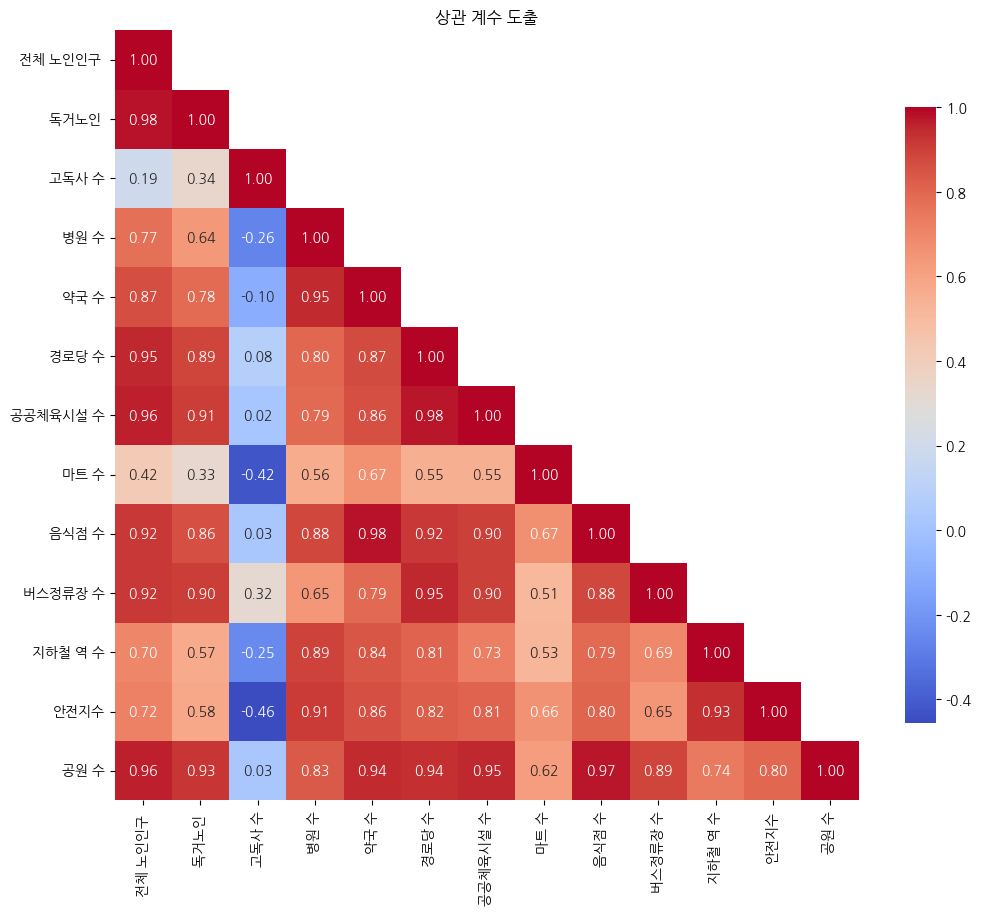

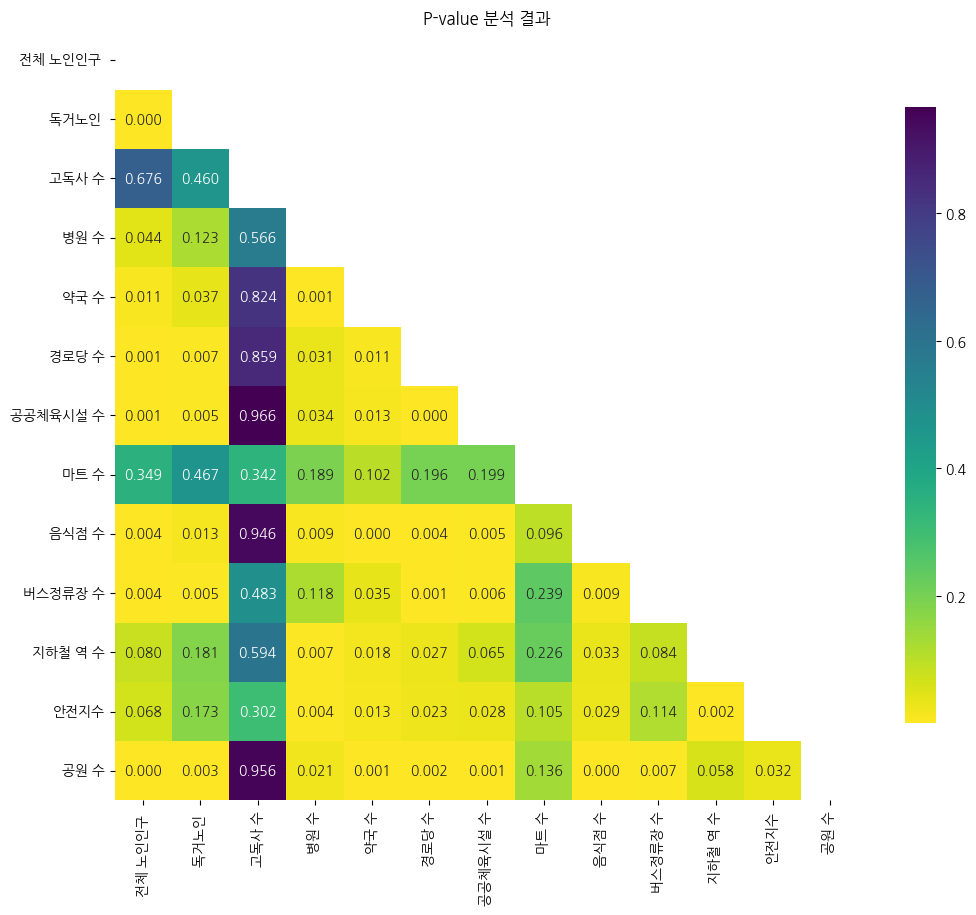

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵을 그리기 위한 마스크 생성: 대칭성을 활용해 상삼각행렬만 표시
mask = np.zeros_like(standardized_df.corr())
mask[np.triu_indices_from(mask, 1)] = True

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(standardized_df.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": 0.8})
plt.title('상관 계수 도출')
plt.savefig('D:\MyCOM\바탕 화면\correlation_matrix.png')  # 이미지 파일로 저장
plt.show()
plt.close()
# p-값 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(p_values_matrix, mask=mask, annot=True, fmt=".3f", cmap='viridis_r', cbar_kws={"shrink": 0.8})
plt.title('P-value 분석 결과')
plt.savefig('D:\MyCOM\바탕 화면\p_value_matrix.png')  # 이미지 파일로 저장
plt.show()
plt.close()